<a href="https://www.kaggle.com/code/sarazahran1/math-chatbot-project?scriptVersionId=274801890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🧮 **Math Chatbot Project (Symbolic Solver + Regression + Graphs)**

Welcome to the **Math Chatbot Project**, an interactive engine designed to handle a wide range of mathematical tasks seamlessly. This project demonstrates a powerful **Math Chatbot** that can:

- **Solve Equations:** Solve algebraic, polynomial, and symbolic equations efficiently.
- **Simplify & Evaluate Expressions:** Handle complex symbolic expressions with ease.
- **Plot Functions:** Visualize mathematical functions and datasets using clear and interactive graphs.
- **Polynomial Regression:** Perform regression analysis to model and predict data trends.

💡**Features at a glance:**
- Interactive input for any mathematical expression or equation.
- Dynamic graph plotting for better understanding of functions.
- Polynomial regression with visualization of fitted curves.

🚀 **Try it live on Hugging Face Spaces:** [SaraZahran-MathBot](https://huggingface.co/spaces/SaraZahran212/SaraZahran-MathBot)

---

This project is perfect for **students, educators, and researchers** who want an easy-to-use tool for symbolic math, data visualization, and regression analysis.

##  **Install Dependencies**

In [1]:
!pip install sympy matplotlib numpy pandas scikit-learn --quiet

# **Import Libraries**

In [2]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy import symbols, Eq
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


# **Define Variables**

In [3]:
x, y, z = symbols("x y z")

# **Symbolic Solver (Equations & Expressions)**

In [4]:
def solve_symbolic_or_plot(user_input):
    reply, fig_path = "", None
    try:
        if "=" in user_input:
            # Equation solving
            left, right = user_input.split("=")
            eq = Eq(sp.sympify(left), sp.sympify(right))
            sol = sp.solve(eq)
            reply = f" Solution: {sol}"
        else:
            # Expression
            expr = sp.sympify(user_input)
            simplified = sp.simplify(expr)
            reply = f" Simplified: {simplified}"
            
            # If variable exists → plot
            if expr.has(x):
                f = sp.lambdify(x, expr, "numpy")
                xs = np.linspace(-10, 10, 400)
                ys = f(xs)
                plt.figure(figsize=(6,4))
                plt.plot(xs, ys, label=str(expr))
                plt.axhline(0, linewidth=0.7)
                plt.axvline(0, linewidth=0.7)
                plt.grid(True)
                plt.legend()
                plt.title("Graph of Expression")
                plt.show()
    except Exception as e:
        reply = f" Could not process input.\nError: {e}"
    return reply

# **Regression Function**

In [5]:
def run_regression(X, Y, degree=1):
    X = np.asarray(X).reshape(-1,1)
    Y = np.asarray(Y).ravel()

    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin", LinearRegression())
    ])
    model.fit(X, Y)
    y_pred = model.predict(X)
    r2 = r2_score(Y, y_pred)

    # Equation string
    coefs = model.named_steps["lin"].coef_
    intercept = model.named_steps["lin"].intercept_
    equation = " + ".join([f"{c:.4f}·x^{i+1}" for i,c in enumerate(coefs)]) + f" + {intercept:.4f}"

    # Plot
    xs = np.linspace(float(np.min(X))-1, float(np.max(X))+1, 300).reshape(-1,1)
    ys = model.predict(xs)
    plt.figure(figsize=(6,4))
    plt.scatter(X, Y, s=20, label="Data")
    plt.plot(xs, ys, color="red", label=f"Fit (deg={degree})")
    plt.grid(True)
    plt.legend()
    plt.title("Regression Fit")
    plt.show()

    return f" Regression done.\nEquation: {equation}\nR² = {r2:.4f}"

# **Example Runs**

 Example 1: Solve equation
 Solution: [2, 3]

 Example 2: Expression with plot


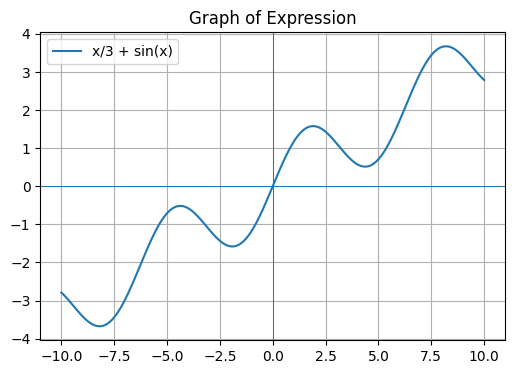

 Simplified: x/3 + sin(x)

 Example 3: Regression


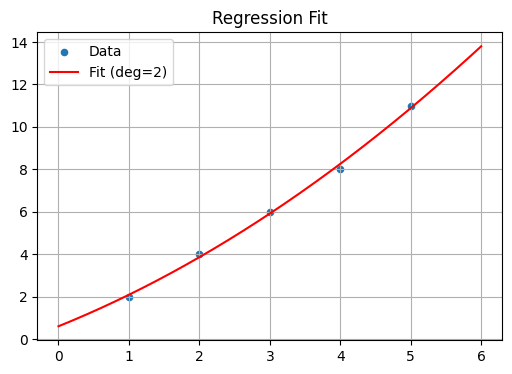

 Regression done.
Equation: 1.3429·x^1 + 0.1429·x^2 + 0.6000
R² = 0.9977


In [6]:
print(" Example 1: Solve equation")
print(solve_symbolic_or_plot("x^2 - 5*x + 6 = 0"))

print("\n Example 2: Expression with plot")
print(solve_symbolic_or_plot("sin(x) + x/3"))

print("\n Example 3: Regression")
X = [1,2,3,4,5]
Y = [2,4,6,8,11]
print(run_regression(X, Y, degree=2))

# **Advanced Examples (Calculus & Limits)**

In [7]:
# Differentiation
expr = sp.sin(x)*x
derivative = sp.diff(expr, x)
print(f" Differentiation of {expr} wrt x = {derivative}")

# Integration
integral = sp.integrate(x**2, x)
print(f" Integration of x^2 wrt x = {integral}")

# Limit
limit_val = sp.limit(sp.sin(x)/x, x, 0)
print(f" Limit of sin(x)/x as x→0 = {limit_val}")

 Differentiation of x*sin(x) wrt x = x*cos(x) + sin(x)
 Integration of x^2 wrt x = x**3/3
 Limit of sin(x)/x as x→0 = 1
